#### Actividad Modulo EDA y Regresión

In [10]:
##Importar librerias
##!pip install matplotlib
##!pip install seaborn 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext, sepa):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, sep=sepa)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))


In [12]:
### Cargue de datos
notas = importDatos('./Datasets/', 'student-mat','.csv', ';')

notas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
datos_NAN(notas)

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school     object           2          0
                                     sex     object           2          0
                                     age      int64           8          0
                                 address     object           2          0
                                 famsize     object           2          0
                                 Pstatus     object           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

In [14]:
### identificamos las variables numéricas
numerico = [i for i in notas.columns if notas[i].dtype!='O']

numerico

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [15]:
### identificamos la variables categoricas que se van a trabajar
categoricas = [i for i in notas.columns if notas[i].dtype=='O']

categoricas

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
categorias = []
for column in notas.columns:
    if notas[column].dtype == "object":
        categoricas.append(column)


data_stu = notas[categoricas]

data_stu.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,...,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,...,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,...,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,...,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,...,home,father,no,yes,yes,no,yes,yes,no,no


In [17]:
###Conversión de datos de tipo texto a numerico (variables dummies)
data_notas = []
for column in notas.columns:
    if notas[column].dtype == "object":
        data_notas.append(column)


def cambTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol]==busqueda, camuno, camdos)
    return df[nomCol]

data_stu['school'] = cambTextBi(data_stu,'school','GP',0,1)
data_stu['sex'] = cambTextBi(data_stu,'sex','F',0,1)
data_stu['address'] = cambTextBi(data_stu,'address','U',0,1)
data_stu['famsize'] = cambTextBi(data_stu,'famsize','GT3',0,1)
data_stu['Pstatus'] = cambTextBi(data_stu,'Pstatus','A',0,1)
data_stu['schoolsup'] = cambTextBi(data_stu,'schoolsup','yes',0,1)
data_stu['famsup'] = cambTextBi(data_stu,'famsup','yes',0,1)
data_stu['paid'] = cambTextBi(data_stu,'paid','yes',0,1)
data_stu['activities'] = cambTextBi(data_stu,'activities','yes',0,1)
data_stu['nursery'] = cambTextBi(data_stu,'nursery','yes',0,1)
data_stu['higher'] = cambTextBi(data_stu,'higher','yes',0,1)
data_stu['internet'] = cambTextBi(data_stu,'internet','yes',0,1)
data_stu['romantic'] = cambTextBi(data_stu,'romantic','yes',0,1)

def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

notas_a = convDummies(data_stu,'Mjob')
notas_b = convDummies(notas_a,'Fjob')
notas_c = convDummies(notas_b,'reason')
data_student = convDummies(notas_c,'guardian')

data_student.head()
datos_NAN(data_student)

Dimesiones: 395 filas, 60 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school      int32           2          0
                                     sex      int32           2          0
                                 address      int32           2          0
                                 famsize      int32           2          0
                                 Pstatus      int32           2          0
                               schoolsup      int32           2          0
                                  famsup      int32           2          0
                                    paid      int32           2          0
                              activities      int32           2          0
                                 nursery      int32           2          0
                                  higher      int32           2          0
                                int

In [18]:
####Agregar las columnas G1,G2 y G3
notas = pd.concat([data_student, notas[["G1", "G2", "G3"]]], axis=1)
notas.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,...,reason_reputation,guardian_father,guardian_mother,guardian_other,guardian_father,guardian_mother,guardian_other,G1,G2,G3
0,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,1,0,5,6,6
1,0,0,0,0,1,1,0,1,1,1,...,0,1,0,0,1,0,0,5,5,6
2,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,1,0,7,8,10
3,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,15,14,15
4,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,6,10,10


In [19]:
##Normalizar
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

datNorm = normaData(notas)

datNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.000000,0.000000,0.000000,1.0
sex,395.0,0.473418,0.499926,0.0,0.000000,0.000000,1.000000,1.0
address,395.0,0.222785,0.416643,0.0,0.000000,0.000000,0.000000,1.0
famsize,395.0,0.288608,0.453690,0.0,0.000000,0.000000,1.000000,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...
guardian_mother,395.0,0.691139,0.462610,0.0,0.000000,1.000000,1.000000,1.0
guardian_other,395.0,0.081013,0.273201,0.0,0.000000,0.000000,0.000000,1.0
G1,395.0,0.494304,0.207450,0.0,0.312500,0.500000,0.625000,1.0
G2,395.0,0.563891,0.197974,0.0,0.473684,0.578947,0.684211,1.0


In [20]:
###Aplicar el test de shapiro
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(datNorm)


,Variable,Valores P,Concepto
0,school,1.401298e-45,No es una variable Normal
1,sex,7.372502e-38,No es una variable Normal
2,address,6.265205e-42,No es una variable Normal
3,famsize,3.147442e-40,No es una variable Normal
4,Pstatus,0.000000e+00,No es una variable Normal
...,...,...,...
58,guardian_mother,8.545118e-40,No es una variable Normal
59,guardian_other,0.000000e+00,No es una variable Normal
60,G1,2.455481e-06,No es una variable Normal
61,G2,2.085406e-07,No es una variable Normal


In [32]:
###Aplicar el test de  D'agostino
from scipy.stats import normaltest
def Dagostino(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = normaltest(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfDago = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfDago

Dagostino(datNorm)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
###Aplicar correlación de Spearman.
def tidy_corr(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Variable_1','Variable_2','R']
    corr_mat = corr_mat.loc[corr_mat['Variable_1']!= corr_mat['Variable_2'],:]
    corr_mat['abs_r'] = np.abs(corr_mat['R'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

corr_matrix = datNorm.corr(method='spearman')

dataCorre= tidy_corr(corr_matrix)

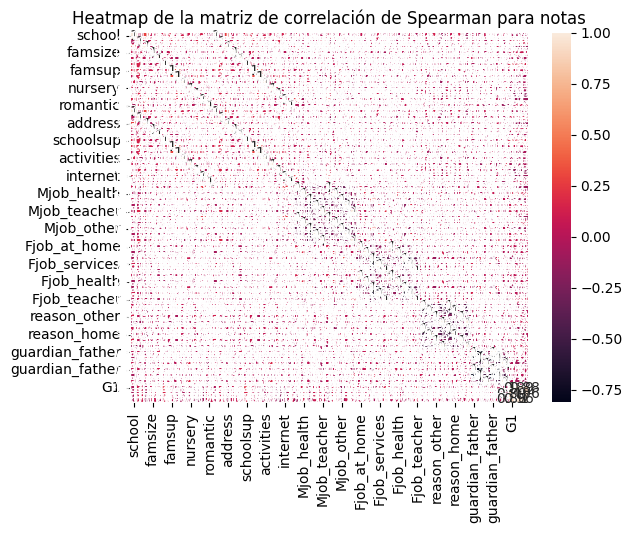

In [33]:
sns.heatmap(notas.corr(method='spearman'), annot=True)
plt.title("Heatmap de la matriz de correlación de Spearman para notas")
plt.show()

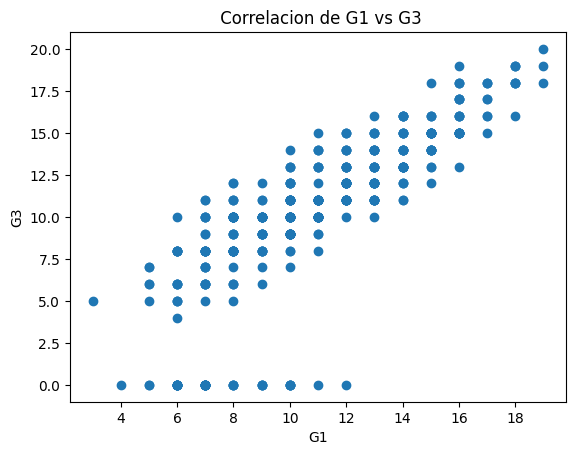

In [ ]:
##Hacer 5 graficas que indiquen lo encontrado en la data.
##GRAFICO 1
plt.scatter(notas["G1"], notas["G3"])
plt.xlabel("G1")
plt.ylabel("G3")
plt.title(" Correlacion de G1 vs G3")
plt.show()

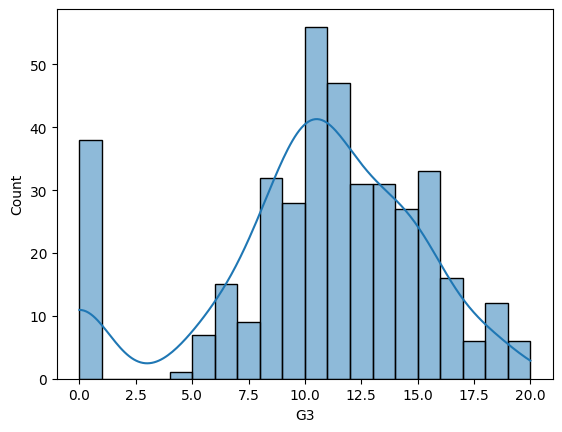

In [28]:
histoPlot(notas,'G3',1,)

In [ ]:
##Definir valor de X  y Y
X = notas.drop(['G1'], axis=1)
y = notas['G1']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

##Sacar los 4 grupos (2 train y 2 testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=42)

##Entrenar el modelo
ml = LinearRegression()

ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

round(r2_score(y_test, y_pred),3)*100

79.60000000000001

<Axes: xlabel='G1', ylabel='Density'>

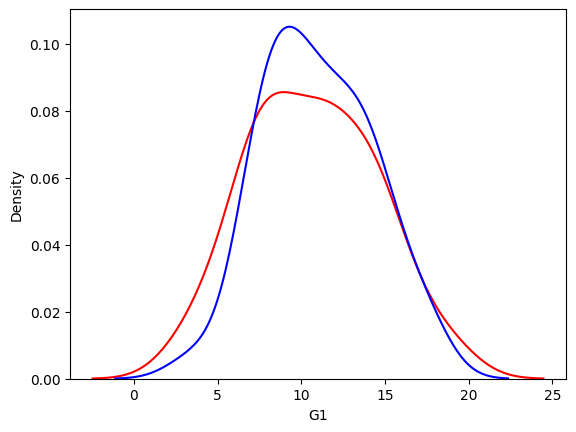

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores Actuales')
sns.distplot(y_pred, hist=False, color='b', label='Valores Predecidos')

In [ ]:
##Modelo OLS
##Agregar una constante entrenamiento X
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

mlTres = sm.OLS(y_train, X_train_sm).fit()

mlTres.params

In [ ]:
print(mlTres.summary())